![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Inteligência Artificial

## Meta-heurísticas

- Professor: Felipe Reis
- Data: 2020-10-07


---
### Instruções Iniciais

#### Bibliotecas Python

Neste trabalho, iremos utilizar duas bibliotecas que implementam meta-heurísticas:
* PyGAD: A Python Library for Building the Genetic Algorithm
* ACopy - Ant Colony Optimization for the Traveling Salesman Problem

A biblioteca [PyGad](https://pypi.org/project/pygad/) é utilizada para implementação de algoritmos genéticos. Sua documentação pode ser encontrada no link abaixo:
* https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html

A biblioteca [ACopy](https://pypi.org/project/acopy/) é utilizada para implementação do algoritmo ACO (*Ant Colony Optimization*). Sua documentação pode ser encontrada no link abaixo:
* https://acopy.readthedocs.io/en/latest/usage.html#quickstart

Para trabalhar com grafos, utilizaremos a biblioteca [TSPLIB95](https://pypi.org/project/tsplib95/). A documentação pode ser encontrada em: 
* https://tsplib95.readthedocs.io/en/stable/


#### Problemas

Para otimização, iremos estudar os seguinte problemas:
* Resolução de uma função matemática comum;
* Maximização de um problema de programação linear;
* Reprodução de uma imagem;
* Resolução do problema do caixeiro viajante (usando biblioteca de ACO). 

Para resolução do problema do caixeiro viajante, iremos utilizar o seguinte repositório MP-TESTDATA - The TSPLIB Symmetric Traveling Salesman Problem Instances, contendo arquivos para uso em problemas de Caixeiro Viajante. O acesso aos problemas pode ser feito pelo link:
* http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/

Dentre os arquivos contendo os repositórios, utilizaremos o arquivo "29 Cities in Bavaria (geographical distance)", que pode ser acessado diretamente pelo link: 
* http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/bayg29.tsp


#### Referências

O tutorial abaixo foi inspirado nas seguintes links:
* https://blog.paperspace.com/genetic-algorithm-applications-using-pygad/
* https://acopy.readthedocs.io/en/latest/usage.html#quickstart
* https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html

---
### Instalação de bibliotecas 

In [ ]:
#instalação biblioteca acopy (otimização por colônia de formigas)
!pip install acopy

In [ ]:
#instalação biblioteca pygad (algoritmos genéticos)
!pip install pygad

In [ ]:
#instalação biblioteca tsplib95 (leitura de grafos)
!pip install tsplib95

In [4]:
!pip install imageio
!pip install gari

### Permissão de Acesso ao Google Drive (somente para uso com Google Colab)

Execute o código abaixo para dar permissão de acesso ao Google Drive.
O código irá indicar um link, que deverá ser acessado.

Após acesso ao link e fornecer permissão de acesso ao Google Colab, cole o código gerado na caixa de texto e digite ENTER.

Esse passo não é necessário (provavelmente nem funcionará) caso esteja usando o Jupyter Notebook.

In [1]:
#somente para uso com Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importação de bibliotecas 

In [6]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

'''
import acopy
import pygad
import tsplib95
'''
import imageio
import gari

---
### Problema 1: Solução de uma Função Linear

A função linear será resolvida usando um Algoritmo Genético (AG).

Suponha uma função que receba um número $n$ de parâmetros e retorne a soma entre eles. A função de $f(x)$ é dada por:

$$f(x) = x_1 + x_2 + x_3 + ... + x_n$$

O objetivo desse exercício é fazer com que a soma gerada pelo AG tenha o mesmo valor do somatório.
Para isso, a função de fitness irá comparar o valor gerado pelo AG em relação ao resultado esperado.

Para isso, é possível definir, entre várias formas, dois métodos de cálculo do valor fitness.
* fitness = 1/(erro absoluto)
* fitness = - (erro absoluto)

No primeiro modo, o valor de fitness aumentará até o infinito. Quanto maior o valor, menor o erro e mais próximo da soma estaremos.

No segundo modo, o valor de fitness é negativo e diminuirá até chegar próximo a zero (zero indica que não há erro entre o valor esperado e o valor gerado pelo AG).

Por padrão, iremos utilizar o segundo modo, uma vez que é mais fácil comparar se um valor está próximo ou não a zero.

In [ ]:
#define o número de genes e cromossomos
num_genes = 10
num_cromossomos = 100

#define lista de n valores de entrada
val_entrada = np.random.randint(0, 10, num_genes)
print(val_entrada)

#define a saída esperada, dada pelo somatório das entradas
saida_esperada = np.sum(val_entrada)
print(saida_esperada)

[2 7 5 0 6 3 0 0 1 1]
25


In [ ]:
def f_on_fitness(ga_instance, population_fitness):
    pop_abs = np.abs(population_fitness) #transforma o valor negativo em positivo
    min1, min2, *_ = np.partition(pop_abs, 1) #obtém os 2 menores valores
    print(min1, min2) #imprime os dois melhores valores absolutos de fitness em uma geração

def f_fitness(solution, solution_idx):
    output = np.sum(solution*val_entrada)
    #fitness = 1.0 / np.abs(output - saida_esperada)
    fitness = - np.abs(output - saida_esperada)
    return fitness

#define parâmetros do algoritmo genético
ga = pygad.GA(fitness_func = f_fitness, #função de fitness
                num_genes = num_genes, #número de genes
                sol_per_pop = num_cromossomos, #número de cromossomos
                num_generations = 10, #número de gerações 
                num_parents_mating = int(num_cromossomos * .2), #num. soluções selecionadas
              
                mutation_probability = .1, #probabilidade de mutação
                crossover_probability = .1, #probabilidade de crossover
              
                init_range_low = -9, #menor valor para variável
                init_range_high = 9, #maior valor para variável
                on_fitness = f_on_fitness #evento para execução de evento fitness
)

#execução do programa
ga.run()

0.18448918904486789 2.7714481012044914
0.09334576790513793 0.1633814005665073
0.07670579361539254 0.09334576790513793
0.07670579361539254 0.07670579361539254
0.0006396052727346557 0.05972105201396971
0.0006396052727346557 0.0006396052727346557
0.0006396052727346557 0.0006396052727346557
0.0006396052727346557 0.0006396052727346557
0.0006396052727346557 0.0006396052727346557
0.0006396052727346557 0.0006396052727346557


In [ ]:
solution, sol_fitness, sol_idx = ga.best_solution()
print("Parâmetros da melhor solução:\n", solution)
#print("Valores da solução (de acordo com a entrada):\n", (val_entrada * solution))
print()

print("Solução encontrada: ", np.sum(val_entrada * solution))
print("Solução esperada: ", saida_esperada)
print()

print("Fitness da melhor solução:", sol_fitness)
print("Índice melhor solution:", sol_idx)

Parâmetros da melhor solução:
 [-6.07077662  7.84773862  0.50687636  3.05011055 -5.50496184  5.86730772
 -2.58671628 -3.65374078 -1.4811156  -3.41867503]

Solução encontrada:  24.999360394727265
Solução esperada:  25

Fitness da melhor solução: -0.0006396052727346557
Índice melhor solution: 0


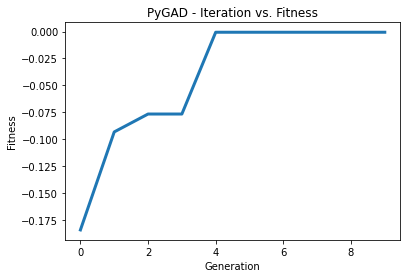

In [ ]:
#gráfico de fitness
ga.plot_result()

---
### Problema 2: Solução de uma Função Linear

Suponha o problema de programação linear abaixo.

Nesse problema devemos maximizar a função objetivo $ f(x) = 1 x_1 + 5 x_2 + 4 x_3 $. No entanto, o problema deve respeitar as restrições, dadas pelas inequações $ x_1 < 10 $ e $ x_2 + x_3 <= 15$. Os valores de $ x1, x_2$ e $x_3$ devem ser maiores ou iguais a zero.

Nesta disciplina, não detalharemos o possível significado das variáveis, uma vez que isso não é escopo da disciplina. No entanto, a formulação abaixo pode representar problemas cotidianos, que serão estudados na disciplina de Pesquisa Operacional.

O problema anterior pode ser resumido na forma:

$$ max~z = 1 x_1 + 5 x_2 + 4 x_3 $$
$$ suj. a \qquad\qquad x_1 < 10 $$
$$ \qquad\quad~ x_2 + x_3 <= 15$$
$$ \qquad\quad~ x1, x_2, x_3 >= 0$$

A solução analítico do problema indica que o resultado é igual a 85.

Ao contrário do exemplo anterior, o exemplo atual saberá qual é o resultado esperado. No entanto, deverá maximizar a função.

Para isso, iremos adicionar penalidades à função de fitness. Caso algum indivíduo desrespeite as restrições, iremos adicionar uma penalidade muito grande, de forma que o indivíduo não seja selecionado para a próxima geração.

In [ ]:
#define o número de genes e cromossomos
num_genes = 3
num_cromossomos = 100

#define os pesos das variaveis (1 x1 + 5 x2 + 4 x3)
pesos_variaveis = [1, 5, 4]
print(pesos_variaveis)

[1, 5, 4]


In [ ]:
def f_on_fitness(ga_instance, population_fitness):
    #print(population_fitness)
    #print(np.min(np.abs(population_fitness)))
    None

def f_fitness(solution, solution_idx):
    penalidade = -10e8
    
    #multiplica os valores de entrada pelos pesos e soma o resultado final (f(x))
    fitness = np.dot(pesos_variaveis, solution)
    
    #restrição 1: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    if(solution[0] > 10):
        fitness += penalidade
    
    #restrição 2: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    if((solution[1] + solution[2]) > 15):
        fitness += penalidade
    
    #restrição 3: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    for i in range(0,num_genes):
        if(solution[i] < 0):
            fitness += penalidade
    
    #retorna o valor de fitness
    return fitness

#define parâmetros do algoritmo genético
ga = pygad.GA(fitness_func = f_fitness, #função de fitness
                num_genes = num_genes, #número de genes
                sol_per_pop = num_cromossomos, #número de cromossomos
                num_generations = 10000, #número de gerações 
                num_parents_mating = int(num_cromossomos * .2), #num. soluções selecionadas
              
                mutation_probability = .05, #probabilidade de mutação
                crossover_probability = 0.05, #probabilidade de crossover
              
                init_range_low = 0, #menor valor para variável
                init_range_high = 9, #maior valor para variável
                on_fitness = f_on_fitness #evento para execução de evento fitness
)

In [ ]:
#execução do programa
ga.run()

sol, _, _ = ga.best_solution()
print("Solução AG: ", np.dot(pesos_variaveis, sol))
print("Solução esperada: 85")
print()

print("Variáveis AG: x1={}, x2={}, x3={}", sol[0], sol[1], sol[2])
print("Variáveis esperadas: x1=10, x2=15, x3=0")

Solução AG:  84.81848606527701
Solução esperada: 85

Variáveis AG: x1={}, x2={}, x3={} 9.99999891825224 14.818644984104465 0.18131555662561194
Variáveis esperadas: x1=10, x2=15, x3=0


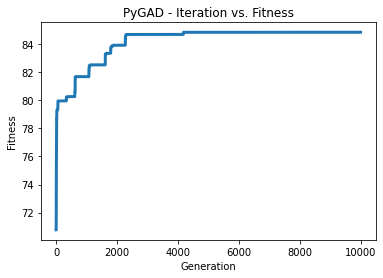

In [ ]:
#gráfico de fitness
ga.plot_result()

---
### Problema 3: Reprodução de Imagens

Algoritmos genéticos podem ser utilizados também para reproduzir imagens, apesar dessa técnica não ser muito comum.

Podemos pensar em uma imagem como um conjunto de pixels, com valores que variam entre 0 e 16.777.216 (3 canais de 256 cores).

Outra forma de representar a imagem é normalizar os valores entre 0 e 1. 
Com isso, a imagem seria mais facilmente representada pelo AG.

No exemplo abaixo foi criado um código para a tentativa de reprodução da imagem abaixo.
O AG tentará reproduzir a imagem.

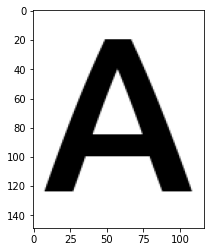

In [7]:
path = 'drive/My Drive/Colab Notebooks/' #pasta do Google Colab no Google Drive
target_im = imageio.imread(path + 'ia-meta-heuristicas/imagens/original.png') #pasta dentro do Google Colab com as imagens
target_im = np.asarray(target_im/255, dtype=np.float)

plt.imshow(target_im)
plt.show()

In [ ]:
target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(solution, solution_idx):
    fitness = np.sum(np.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = np.sum(target_chromosome) - fitness
    return fitness

In [ ]:
def img2chromosome(img_arr):
    return np.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("Erro no tamanho ({}) e formato do vetor ({}).".format(len(vector), shape))

    return np.reshape(a=vector, newshape=shape)

In [ ]:
####### ATENÇÃO #########
# O código abaixo poderá levar muitos minutos para ser executado
# Avalie a redução do número de gerações (pouca gerações podem fazer com que o algoritmo não aprenda)
# Para ver o resultado, de acordo com o número de gerações (imagem original), acesse o link abaixo:
# https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
#########################

ga = pygad.GA(num_generations=10000,
                num_parents_mating=20,
                fitness_func=fitness_fun,
                sol_per_pop=100,
                num_genes=target_im.size,
                init_range_low=0.0,
                init_range_high=1.0,
                mutation_percent_genes=0.02,
                mutation_type="random",
                mutation_by_replacement=True,
                crossover_probability = 0.1,        
                random_mutation_min_val=0.0,
                random_mutation_max_val=1.0
)

ga.run()

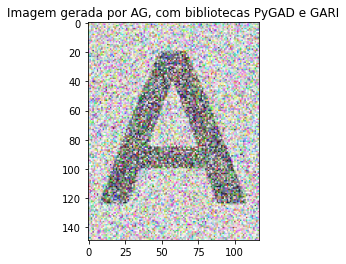

In [ ]:
#impressão da imagem gerada pelo AG
solution, _, _ = ga.best_solution()

result = gari.chromosome2img(solution, target_im.shape)
plt.imshow(result)
plt.title("Imagem gerada por AG, com bibliotecas PyGAD e GARI")
plt.show()

---
### Problema 4: Problema do Caixeiro Viajante

O problema do Caixeiro viajante pode ser resolvido utilizando algoritmos genéticos e o otimização por colônia de formigas.

Para solução por algoritmos genéticos, é necessário alterar a função de fitness, para adequação ao problema.
Os links abaixo contém implementações de algoritmos genéticos para solução do problema do caixeiro viajante (esses links, no entanto, implementam ou utilizam outras bibliotecas de AGs).

* https://medium.com/@pasdan/genetic-algorithm-the-travelling-salesman-problem-via-python-deap-f238e0dd1a73
* https://github.com/MorvanZhou/Evolutionary-Algorithm

#### Biblioteca ACopy

A biblioteca ACopy é destinada a resolução do problema do caixeiro viajante usando Otimização por Colônia de formigas.

A solução desse problema pode ser facilmente realizada com a biblioteca.

Para acessar a documentação da biblioteca, utilize o link abaixo:
* https://acopy.readthedocs.io/en/latest/usage.html#quickstart

In [ ]:
#cria um solver e uma colônia de formigas

#parâmetros 
#rho - taxa evaporação dos feromônios; 
#q - capacidade total de feromônios de cada formiga
#alpha - importância relativa dos feromônios
#beta - importância relativa das distâncias

solver = acopy.Solver(rho=.03, q=1) 
colony = acopy.Colony(alpha=1, beta=3)

In [ ]:
#recupera o arquivo de distância entre as cidades, que será utilizado para o prob. caixeiro viajante
#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/bayg29.tsp
path = 'drive/My Drive/Colab Notebooks/' #pasta do Google Colab no Google Drive
problem = tsplib95.load_problem(path + 'ia-meta-heuristicas/bayg29.tsp')
G = problem.get_graph()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) load_problem. (Will be removed in newer versions. Use `tsplib95.load` instead.) -- Deprecated since version 7.0.0.
  after removing the cwd from sys.path.


In [ ]:
# resolve o problema, usando o grafo, colônia de formigas e um limite de 100 iterações/gerações.
tour = solver.solve(G, colony, limit=1000)

In [ ]:
#imprime o custo total da solução gerada
print(tour.cost)

1643


In [ ]:
#imprime os nós da solução gerada
print('Nós:')
print(tour.nodes)
print()

#imprime o caminho da solução gerada
print('Caminho:')
print(tour.path)

Nós:
[17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24, 1, 28, 12, 6, 9, 5, 26, 29, 3, 21, 2, 20, 10, 4, 15, 18, 14]

Caminho:
[(17, 22), (22, 11), (11, 19), (19, 25), (25, 7), (7, 23), (23, 8), (8, 27), (27, 16), (16, 13), (13, 24), (24, 1), (1, 28), (28, 12), (12, 6), (6, 9), (9, 5), (5, 26), (26, 29), (29, 3), (3, 21), (21, 2), (2, 20), (20, 10), (10, 4), (4, 15), (15, 18), (18, 14), (14, 17)]
